<a href="https://colab.research.google.com/github/ayanoglu/Denoising-Autoencoder/blob/CodeSeparation/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializations and Data Preperation

In [29]:
import matplotlib.pyplot as plt 
from keras.datasets import mnist 
from keras.layers import Dense 
from keras.layers import Input
from keras.models import Model 
from tensorflow.keras import layers
import numpy as np 
import keras

Image Data Normalized, Flattened

In [30]:
(x_train, trainY), (x_test, testY) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

Model1 - Noise Factor 0.1

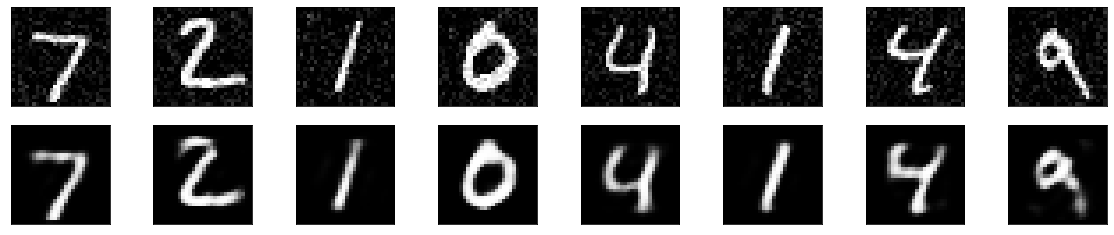

In [39]:
# Generate Random Noise in the xhape of train images and add to the image matrix values, cli[ to keep values within range 
noise_factor = 0.1
noise = np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy = x_train + noise 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
noise = np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy = x_test + noise 
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 

# 28x28 -> 784
input_img = keras.Input(shape=(784,))
# Data is encoded towards the botleneck and the decoded to the original at the output layer. encoded represents the layers of encoding section
encoded = layers.Dense(32, activation='relu')(input_img) # 32 is the size of our encoded representations, 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# "decoded" represents the ouput layer, the second part of the autoencoder where the image is reconstructed.
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# model that ties the imput to the decoded image
autoencoder = keras.Model(input_img, decoded)

# model that ties the input image to the encoded image rrepresentation
encoder = keras.Model(input_img, encoded)


encoded_input = keras.Input(shape=(32,)) # Here, the input is defined, 32 dimensions

decoder_layer = autoencoder.layers[-1] # autoencoder has the decoder layer at its last layer (2nd section mentioned above)

# model that ties the output of encoder to the decoder image rrepresentation
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Here we compile the tied autoencoder model


autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test), verbose=0)

# Predict from the test set 
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 8  # display 8 digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction of the noisy imagfes
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model 2 - Noise Factor 0.5

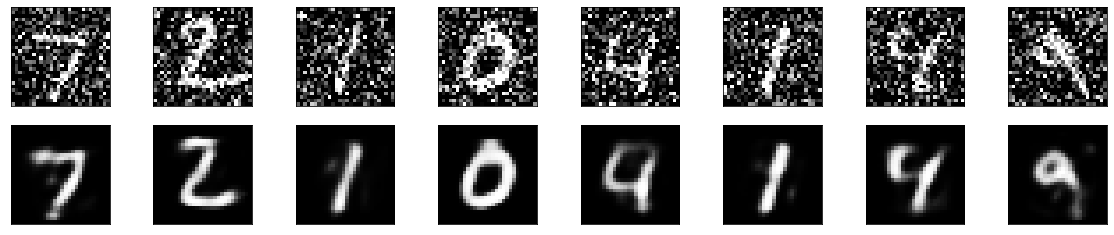

In [40]:
# Generate Random Noise in the xhape of train images and add to the image matrix values, cli[ to keep values within range 
noise_factor = 0.5
noise = np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy = x_train + noise 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
noise = np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy = x_test + noise 
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 

# 28x28 -> 784
input_img = keras.Input(shape=(784,))
# Data is encoded towards the botleneck and the decoded to the original at the output layer. encoded represents the layers of encoding section
encoded = layers.Dense(32, activation='relu')(input_img) # 32 is the size of our encoded representations, 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# "decoded" represents the ouput layer, the second part of the autoencoder where the image is reconstructed.
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# model that ties the imput to the decoded image
autoencoder = keras.Model(input_img, decoded)

# model that ties the input image to the encoded image rrepresentation
encoder = keras.Model(input_img, encoded)


encoded_input = keras.Input(shape=(32,)) # Here, the input is defined, 32 dimensions

decoder_layer = autoencoder.layers[-1] # autoencoder has the decoder layer at its last layer (2nd section mentioned above)

# model that ties the output of encoder to the decoder image rrepresentation
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Here we compile the tied autoencoder model


autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test), verbose=0)

# Predict from the test set 
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 8  # display 8 digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction of the noisy imagfes
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model 3 - Noise Factor 1

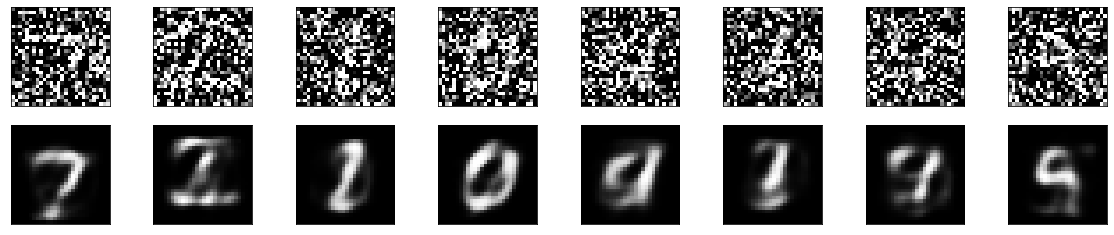

In [41]:
# Generate Random Noise in the xhape of train images and add to the image matrix values, cli[ to keep values within range 
noise_factor = 1
noise = np.random.randn(*x_train.shape) * noise_factor 
x_train_noisy = x_train + noise 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
noise = np.random.randn(*x_test.shape) * noise_factor 
x_test_noisy = x_test + noise 
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 

# 28x28 -> 784
input_img = keras.Input(shape=(784,))
# Data is encoded towards the botleneck and the decoded to the original at the output layer. encoded represents the layers of encoding section
encoded = layers.Dense(32, activation='relu')(input_img) # 32 is the size of our encoded representations, 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# "decoded" represents the ouput layer, the second part of the autoencoder where the image is reconstructed.
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# model that ties the imput to the decoded image
autoencoder = keras.Model(input_img, decoded)

# model that ties the input image to the encoded image rrepresentation
encoder = keras.Model(input_img, encoded)


encoded_input = keras.Input(shape=(32,)) # Here, the input is defined, 32 dimensions

decoder_layer = autoencoder.layers[-1] # autoencoder has the decoder layer at its last layer (2nd section mentioned above)

# model that ties the output of encoder to the decoder image rrepresentation
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Here we compile the tied autoencoder model


autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test), verbose=0)

# Predict from the test set 
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 8  # display 8 digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction of the noisy imagfes
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Explanations

In [42]:
print(""" -- GOAL 4 -- 
   The top rows of the figures are the noisy digits for each noise factor we applied (0.1, 0.5 and 1.0), 
and the bottom rows of the figures are the reconstructed digits (belonging to the given noise factor).  
   As the noise factor gets larger, the reconstructed image looses some features or gaines some additional 
features sourced by the noise (for example an additional dot sometimes appears on the left side of digit 7
for NF=0.5). Increasing the number of epochs solves some of theses issues (additional dot on left side of
digit 7 is fixed with epoch num=20). But then some additional features started occuring on other digits, 
therefore I decided to keep the epoch number at 10. 
   Even though it is really difficult to make sense out of the noisy images of the Noise factor 1 group, 
the Autoencoder is capable of generating images that arensomewhat closer to representing a digit. This tells
us that the trained autoencoder through 60000 samples is easily capable of proper weight assigments even with 
such noisy images. """) 

 -- GOAL 4 -- 
   The top rows of the figures are the noisy digits for each noise factor we applied (0.1, 0.5 and 1.0), 
and the bottom rows of the figures are the reconstructed digits (belonging to the given noise factor).  
   As the noise factor gets larger, the reconstructed image looses some features or gaines some additional 
features sourced by the noise (for example an additional dot sometimes appears on the left side of digit 7
for NF=0.5). Increasing the number of epochs solves some of theses issues (additional dot on left side of
digit 7 is fixed with epoch num=20). But then some additional features started occuring on other digits, 
therefore I decided to keep the epoch number at 10. 
   Even though it is really difficult to make sense out of the noisy images of the Noise factor 1 group, 
the Autoencoder is capable of generating images that arensomewhat closer to representing a digit. This tells
us that the trained autoencoder through 60000 samples is easily capable of prop